### 1.选题背景
随着医疗技术和数据采集能力的体高，我们能够获得越来越多的患者数据，这些数据规模庞大、结构复杂，传统的统计方法和医学专家难以充分挖掘其中的信息，引入数据挖掘的方法可以帮助医生决策和减少专业人员的工作量。
乳腺癌是一种常见的癌症类型，对于医学研究和临床诊断具有重要意义，通过数据挖掘方法，我们可以对乳腺癌的数据进行模型训练和分类。通过对乳腺组织细胞的特征数据建模，可以预测细胞瘤为良性或者为恶性，通过引入数据挖掘方法，利用计算机的高性能帮助医生进行早期的诊断和决策。

### 2.分析目标
使用数据挖掘的方法，降维分析乳腺癌的数据，并使用svm和逻辑回归对细胞分类，以达到辅助医生决策的作用。

In [70]:
##导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 3.数据获取和说明
此数据集为网上收集的乳腺癌，可以利用这些数据集构建分类模型，预测患者肿瘤性质。
此数据集包含患者肿瘤的六个特征，分别是周长、面积、光滑度、紧凑性、凹陷和凹陷点六个特征，最后一列为标签，1表示为良性，0表示恶性，共569行。


In [71]:
##读取自制的乳腺癌数据
pd_data = pd.read_excel("乳腺癌数据集.xlsx")
##pd_data.to_excel("乳腺癌数据集.xlsx",index=False)
pd_data

,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,target
0,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0
1,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0
2,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0
3,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0
4,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0
...,...,...,...,...,...,...,...
564,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0
565,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0
566,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0
567,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0


### 4.数据探索和预处理
使用`pandas`自带的`describe()`方法进简单的描述分析，由`count`一行数据可以看出数据并无缺失值，不需要对缺失值进行处理。但`mean`表示的各特征均值差异却比较大，会影响模型的效率和精度，为了消除这种数据量纲之间的差异，使用`sklearn`的数据预处理包对数据缩放，同时考虑到数据并不符合正态分布，故决定使用归一化预处理数据。归一化是一种常用的数据处理方法，而`MinMaxScaler`将数据缩放到[0,1]之间，消除了不同数据单位的影响，提高模型的性能。

In [72]:
##数据总体描述
pd_data.describe()

,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.627417
std,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.483918
min,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.000000
25%,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.000000
50%,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,1.000000
75%,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,1.000000
max,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,1.000000


In [87]:
##数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pd_data.iloc[:,:-2] = scaler.fit_transform(pd_data.iloc[:,:-2])

我们对乳腺癌数据进行数据归一化操作，先初始化了一个`scaler`对象，然后使用`fit_transform`对数据进行归一个处理，最后将结果替换原来的数据。

### 5.数据建模和分析
pca是一种非常强大的降维工具，它可以帮助我们讲高维数据转换成低维数据，同时又保留数据的主要特征，不至于损失太多的信息，从而减少计算成本和提高模型的效率。

In [85]:
##数据降维，降为二维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
d_data = pca.fit_transform(pd_data.iloc[:,:-2])

array([[ 0.31423462,  0.2266522 ],
       [-0.06933313,  0.11324234],
       [ 0.14008562,  0.08031444],
       ...,
       [ 0.08387815,  0.0036757 ],
       [ 0.31081148,  0.03231363],
       [-0.16092045,  0.03091343]])

初始化一个`n_components`为2的PCA模型，之后使用`fit_transform`拟合数据，并把数据保存到d_data中。

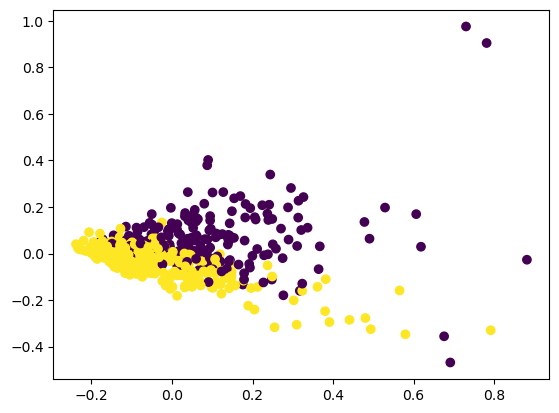

In [75]:
##使用scatter
plt.scatter(x=d_data[:,0],y=d_data[:,1],c=pd_data["target"])

由散点图可以看出降维后的数据有一条比较明显的分界线，证明了PCA很好地发挥了作用。观察散点图可以看出，这是一个典型的二分类问题，由此考虑可以使用SVM或者逻辑回归模型。
svm是一种常见的分类算法，这个模型会在特征空间中找到一个最有超平面，将不同类别分开，达到数据分类的效果。

In [76]:
from sklearn import svm
clf = svm.SVC(kernel="linear")

In [77]:
clf.fit(pd_data.iloc[:,:-2],pd_data["target"])

SVC(kernel='linear')

In [89]:
from sklearn.metrics import accuracy_score
pred1 = clf.predict(pd_data.iloc[:,:-2])
score1 = accuracy_score(pd_data["target"],pred)
score1

0.820738137082601

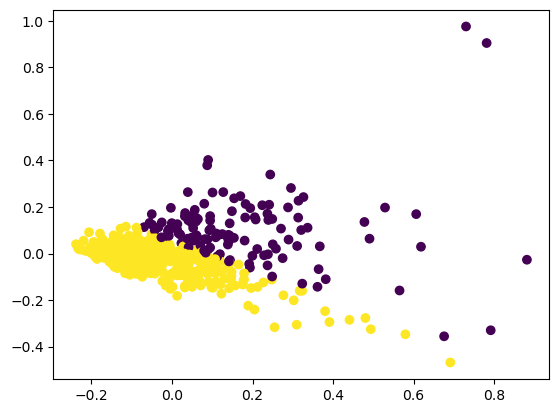

In [91]:
plt.scatter(x=d_data[:,0],y=d_data[:,1],c=pred1)

首先创建了一个SVM对象，并使用线性核函数，并用`fit`方法拟合数据，最后用`predict`预测输出。
导入`accuracy_score`来计算模型的精确度，打印`score1`得到模型精确度为82%，SVM对乳腺癌数据进行了较好的分类。
画出数据的散点图，散点图的颜色为SVM模型的输出结果，发现数据有一个明显的决策边界对数据较好的进行了分类。

In [92]:
##导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
lgf = LogisticRegression()
lgf.fit(pd_data.iloc[:,:-2],pd_data["target"])

LogisticRegression()

In [93]:
pred2 = lgf.predict(pd_data.iloc[:,:-2])
score2 = accuracy_score(pd_data["target"],pred2)
score2

0.7908611599297012

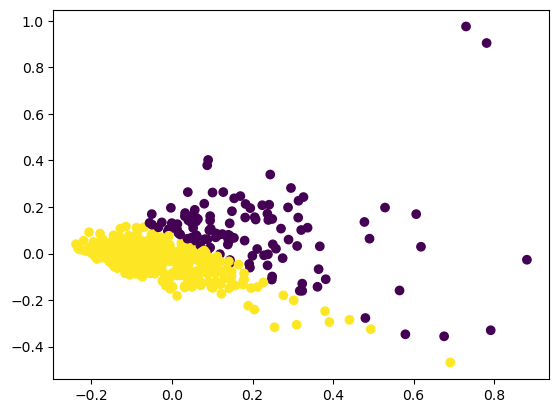

In [96]:
plt.scatter(x=d_data[:,0],y=d_data[:,1],c=pred2)

使用逻辑回归模型同样可以得到一个明显的决策边界，但是相较于SVM的82%的精确度，逻辑回归模型79%的精确度显得有些不足，这是因为逻辑回归是一个简单的模型，并不能很好的适应复杂的数据集。

### 6.结果描述和解释
从准确率来看，SVM比逻辑回归好，逻辑回归面对复杂的数据集难以提高精度，在数据集分布复杂的情况下应该考虑使用SVM。
从可视化的结果来看，SVM和逻辑回归都有一个相似的决策边界，这是因为降维后的数据本身具有一个明显的边界线，线性分类器都可以很好地分离数据，在这种情况下两个模型都学习到了相同的决策边界，因此它们在这些情况下可能会得到相似的分类准确率。
基于此，我们可以使用训练好的SVM模型构建分类模型，输入患者的细胞癌相关信息，预测患者肿瘤性质，辅助医生诊断决策。